# **Aktsiahindade simuleerimine**

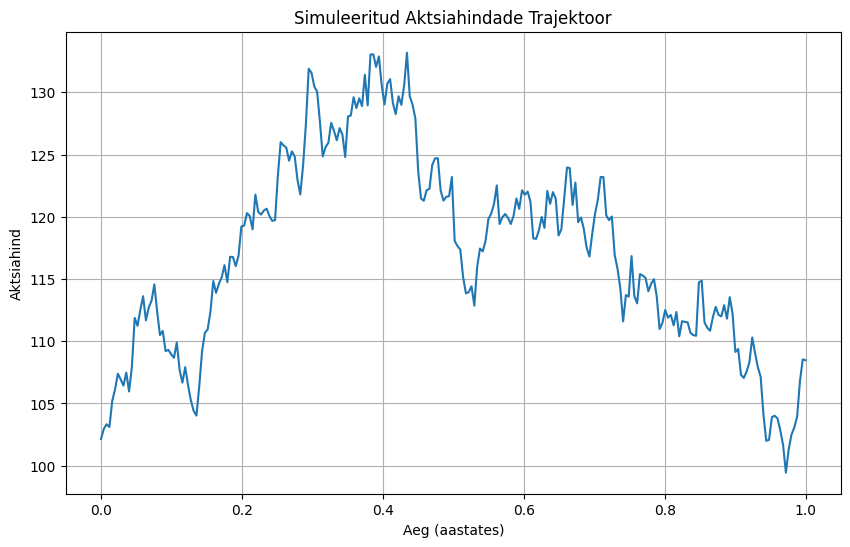

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_prices(S0, mu, sigma, T, dt):
    """
    Simuleerib aktsiahindade liikumist geomeetrilise Browni liikumise abil.

    :param S0: Algne aktsiahind (initial stock price)
    :param mu: Oodatav tootlus (expected return)
    :param sigma: Volatiilsus (volatility)
    :param T: Aeg horisont (time horizon in years)
    :param dt: Ajasamm (time step in years)
    :return: Aktsiahindade trajektoorid (simulated stock price path)
    """
    N = int(T / dt)  # Ajasammude arv (number of time steps)
    t = np.linspace(0, T, N)  # Aja vektor (time vector)
    W = np.random.standard_normal(size=N)  # Standardne normaaljaotus (standard normal distribution)
    W = np.cumsum(W) * np.sqrt(dt)  # Browni liikumine (Brownian motion)

    # Aktsiahindade simulatsioon geomeetrilise Browni liikumise järgi
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # Eksponeerimine, et saada tegelikud aktsiahinnad

    return S, t

# Parameetrid
S0 = 100  # Algne hind
mu = 0.05  # Oodatav tootlus (5%)
sigma = 0.2  # Volatiilsus (20%)
T = 1.0  # Aeg horisont (1 aasta)
dt = 1/252  # Ajasamm (1 päev, aastas on umbes 252 kauplemispäeva)

# Aktsiahindade simulatsioon
stock_prices, time_vector = simulate_stock_prices(S0, mu, sigma, T, dt)

# Tulemuste visualiseerimine
plt.figure(figsize=(10, 6))
plt.plot(time_vector, stock_prices)
plt.title('Simuleeritud Aktsiahindade Trajektoor')
plt.xlabel('Aeg (aastates)')
plt.ylabel('Aktsiahind')
plt.grid(True)
plt.show()


# 1. OOP ja Pydantic
Loome klassistruktuuri, mis kasutab Pydantic'i andmevalideerimiseks ja aktsiahindade simuleerimiseks.

Selgitused:

StockParameters: See on Pydantic'i mudel, mis valideerib aktsiahindade simuleerimiseks vajalikud parameetrid. Kasutame Field ja validator annotatsioone andmete valideerimiseks ja lisame selgitusi.

StockSimulator: Klass, mis kasutab antud parameetreid ja simuleerib aktsiahindu. Samuti on olemas meetod tulemuste visualiseerimiseks (plot_simulation).

<ipython-input-3-6f99bb3cab2c>:12: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.8/migration/
  @validator("mu", "sigma")


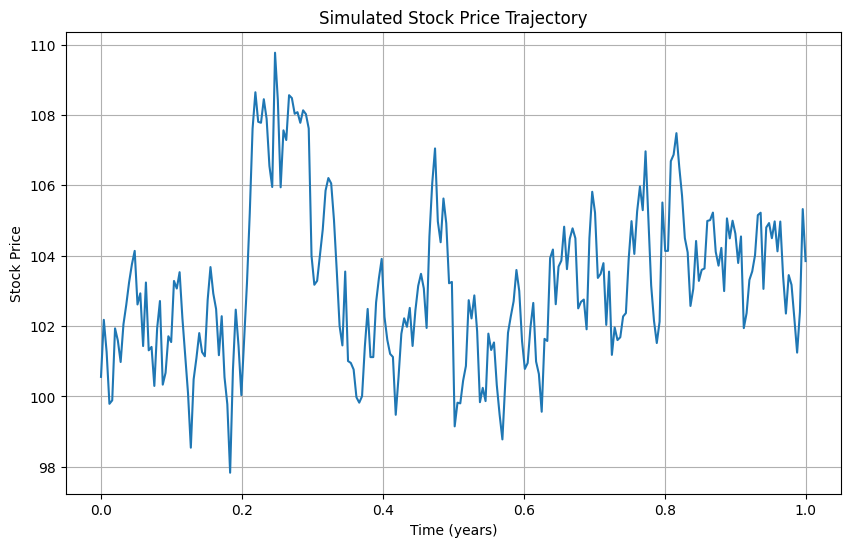

In [3]:
from pydantic import BaseModel, Field, validator
import numpy as np
import matplotlib.pyplot as plt

class StockParameters(BaseModel):
    S0: float = Field(..., gt=0, description="Initial stock price")
    mu: float = Field(..., description="Expected return (annualized)")
    sigma: float = Field(..., gt=0, description="Volatility (annualized)")
    T: float = Field(..., gt=0, description="Time horizon in years")
    dt: float = Field(..., gt=0, description="Time step in years")

    @validator("mu", "sigma")
    def check_positive(cls, v):
        if v < 0:
            raise ValueError("mu and sigma must be non-negative")
        return v

class StockSimulator:
    def __init__(self, params: StockParameters):
        self.params = params

    def simulate(self):
        N = int(self.params.T / self.params.dt)
        t = np.linspace(0, self.params.T, N)
        W = np.random.standard_normal(size=N)
        W = np.cumsum(W) * np.sqrt(self.params.dt)
        X = (self.params.mu - 0.5 * self.params.sigma**2) * t + self.params.sigma * W
        S = self.params.S0 * np.exp(X)
        return S, t

    def plot_simulation(self):
        stock_prices, time_vector = self.simulate()
        plt.figure(figsize=(10, 6))
        plt.plot(time_vector, stock_prices)
        plt.title('Simulated Stock Price Trajectory')
        plt.xlabel('Time (years)')
        plt.ylabel('Stock Price')
        plt.grid(True)
        plt.show()

# Parameetrid
params = StockParameters(S0=100, mu=0.05, sigma=0.2, T=1.0, dt=1/252)
simulator = StockSimulator(params)
simulator.plot_simulation()


# 2. Design Patterns - Strategy Pattern
Kasutame strateegiamustrit (Strategy Pattern), et pakkuda erinevaid meetodeid aktsiahindade simuleerimiseks.

Selgitused:
SimulationStrategy: Abstraktne baasklass, mis määrab ära strateegia simulatsioonimeetoditele.

GeometricBrownianMotion ja LogNormalSimulation: Need on kaks erinevat simulatsioonistrateegiat, mida saab kasutada sõltuvalt vajadustest.

GeometricBrownianMotion: See strateegia kasutab geomeetrilist Browni liikumist, mis on klassikaline meetod aktsiahindade modelleerimiseks. Seda kasutatakse sageli finantsmudelites.

LogNormalSimulation: See strateegia genereerib aktsiahinnad lognormaalse jaotuse alusel, mis võib olla sobiv näiteks teatud tüüpi varade või olukordade simuleerimiseks, kus hinnaliikumised järgivad lognormaalset jaotust.

StockSimulatorWithStrategy: See klass võimaldab strateegiate vahetamist. Saame kasutada erinevaid simulatsioonimeetodeid lihtsalt strateegiat muutes.

Kasutades seda lähenemist, saab hõlpsasti lisada uusi strateegiaid (näiteks erinevad simulatsioonimeetodid), ilma et peaks olemasolevat koodi muutma. See järgib SOLID-põhimõtteid, eriti "Open-Closed Principle", mis ütleb, et klassid peaksid olema avatud laiendamiseks, kuid suletud muutmiseks.

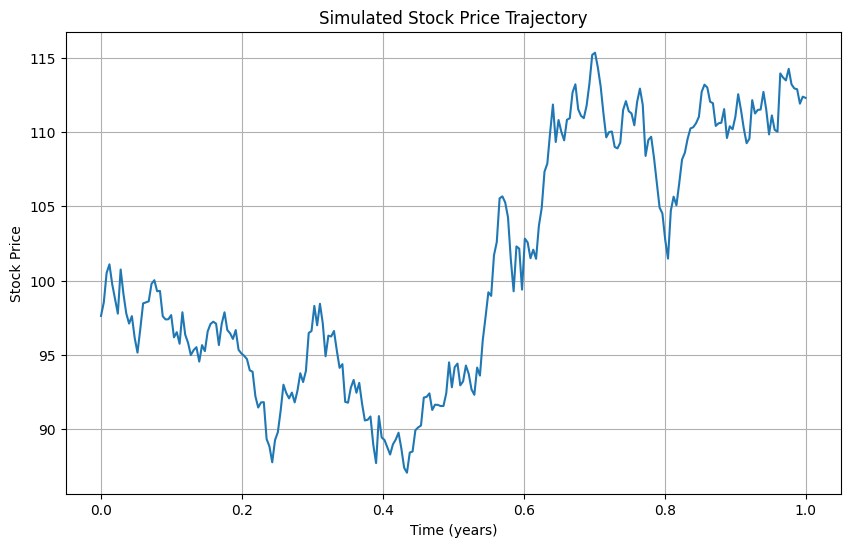

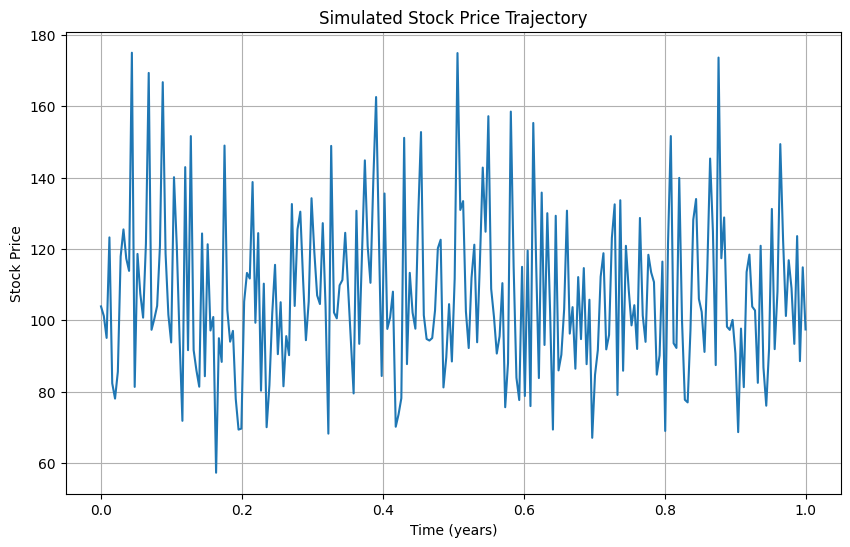

In [4]:
from abc import ABC, abstractmethod

class SimulationStrategy(ABC):
    @abstractmethod
    def simulate(self, S0, mu, sigma, T, dt):
        pass

class GeometricBrownianMotion(SimulationStrategy):
    def simulate(self, S0, mu, sigma, T, dt):
        N = int(T / dt)
        t = np.linspace(0, T, N)
        W = np.random.standard_normal(size=N)
        W = np.cumsum(W) * np.sqrt(dt)
        X = (mu - 0.5 * sigma**2) * t + sigma * W
        S = S0 * np.exp(X)
        return S, t

class LogNormalSimulation(SimulationStrategy):
    def simulate(self, S0, mu, sigma, T, dt):
        N = int(T / dt)
        t = np.linspace(0, T, N)
        X = np.random.lognormal(mu, sigma, N)
        S = S0 * X
        return S, t

class StockSimulatorWithStrategy:
    def __init__(self, strategy: SimulationStrategy, params: StockParameters):
        self.strategy = strategy
        self.params = params

    def simulate_and_plot(self):
        stock_prices, time_vector = self.strategy.simulate(
            self.params.S0, self.params.mu, self.params.sigma, self.params.T, self.params.dt
        )
        plt.figure(figsize=(10, 6))
        plt.plot(time_vector, stock_prices)
        plt.title('Simulated Stock Price Trajectory')
        plt.xlabel('Time (years)')
        plt.ylabel('Stock Price')
        plt.grid(True)
        plt.show()

# Kasutamine
params = StockParameters(S0=100, mu=0.05, sigma=0.2, T=1.0, dt=1/252)
gbm_strategy = GeometricBrownianMotion()
simulator = StockSimulatorWithStrategy(gbm_strategy, params)
simulator.simulate_and_plot()

lognormal_strategy = LogNormalSimulation()
simulator.strategy = lognormal_strategy
simulator.simulate_and_plot()


# 3. Decorators
Decorators on kasulikud, kui on vaja lisada funktsionaalsust olemasolevatele meetoditele ilma koodi muutmata.

Selgitused:
timing_decorator: See decorator mõõdab, kui kaua funktsiooni täitmine aega võtab, ja prindib selle välja. Seda saab kasutada selleks, et optimeerida koodi ja tuvastada kitsaskohti simulatsioonis.

@timing_decorator: Selle märgendiga lisatakse decorator simulate_geometric_brownian_motion funktsioonile, misjärel iga kord, kui seda funktsiooni käivitatakse, logitakse täitmisaeg.

In [5]:
import time

def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Function {func.__name__} executed in {end_time - start_time:.4f} seconds")
        return result
    return wrapper

@timing_decorator
def simulate_geometric_brownian_motion(S0, mu, sigma, T, dt):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S, t

# Näide kasutamiseks
S0 = 100
mu = 0.05
sigma = 0.2
T = 1.0
dt = 1/252

prices, times = simulate_geometric_brownian_motion(S0, mu, sigma, T, dt)


Function simulate_geometric_brownian_motion executed in 0.0012 seconds


# 4. Näide: Kombineerimine
Siin kombineerime OOP, Decorators ja Pydantic, et luua paindlik ja võimas tööriist aktsiahindade simuleerimiseks.

Selgitused:
SimulationFramework: Klass, mis ühendab strateegia ja parameetrid. run_simulation meetod käivitab simulatsiooni ja kasutab timing_decorator-i täitmisaja logimiseks. plot meetod visualiseerib tulemused.

Function run_simulation executed in 0.0007 seconds


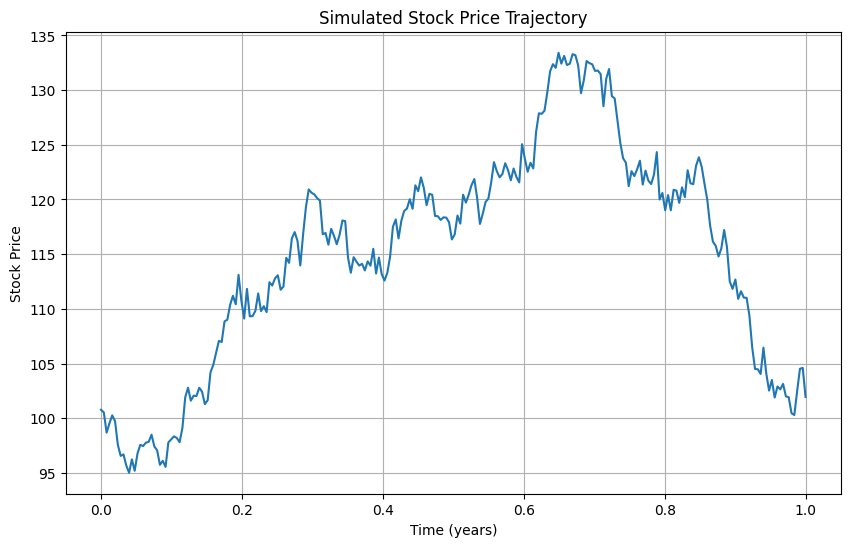

In [6]:
class SimulationFramework:
    def __init__(self, strategy: SimulationStrategy, params: StockParameters):
        self.strategy = strategy
        self.params = params

    @timing_decorator
    def run_simulation(self):
        return self.strategy.simulate(
            self.params.S0, self.params.mu, self.params.sigma, self.params.T, self.params.dt
        )

    def plot(self):
        stock_prices, time_vector = self.run_simulation()
        plt.figure(figsize=(10, 6))
        plt.plot(time_vector, stock_prices)
        plt.title('Simulated Stock Price Trajectory')
        plt.xlabel('Time (years)')
        plt.ylabel('Stock Price')
        plt.grid(True)
        plt.show()

# Kasutamine
params = StockParameters(S0=100, mu=0.05, sigma=0.2, T=1.0, dt=1/252)
strategy = GeometricBrownianMotion()
framework = SimulationFramework(strategy, params)
framework.plot()
